In [570]:
import pandas as pd 
import joblib as jl
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [571]:
vars =['Churn Reason_Attitude of support person', 'Unnamed: 0',
       'Churn Reason_Competitor had better devices',
       'Churn Reason_Competitor made better offer',
       'Churn Reason_Competitor offered higher download speeds',
       'Churn Reason_Competitor offered more data', 'Churn Reason_Deceased',
       'Churn Reason_Extra data charges',
       'Churn Reason_Lack of affordable download/upload speed',
       'Churn Reason_Lack of self-service on Website',
       'Churn Reason_Limited range of services',
       'Churn Reason_Long distance charges', 'Churn Reason_Moved',
       'Churn Reason_Network reliability',
       'Churn Reason_Poor expertise of online support',
       'Churn Reason_Poor expertise of phone support',
       'Churn Reason_Price too high', 'Churn Reason_Product dissatisfaction',
       'Churn Reason_Service dissatisfaction', 'Churn Reason_cliente_activo', 

       "Churn Reason_Don't know", "Churn Value" , "Unnamed: 0", "Gender_Male", "Senior Citizen_Yes", "Contract_Two year", "Payment Method_Credit card (automatic)",
       "Partner_Yes" , "Phone Service_Yes","Multiple Lines_No phone service", "Online Security_No internet service","Internet Service_Fiber optic"
       
       ]

In [572]:
model = jl.load('random5.pkl')
data =  pd.read_csv("dataML.csv")
data_model = data.copy(deep=True)


In [573]:
data_model.drop(vars , axis=1 , inplace= True)
data_model.shape

(7032, 23)

In [574]:
scaler = StandardScaler()
datosA = scaler.fit_transform(data_model)

ipca = IncrementalPCA( n_components=5, batch_size= 10).fit(datosA)
datosA = ipca.transform(datosA)

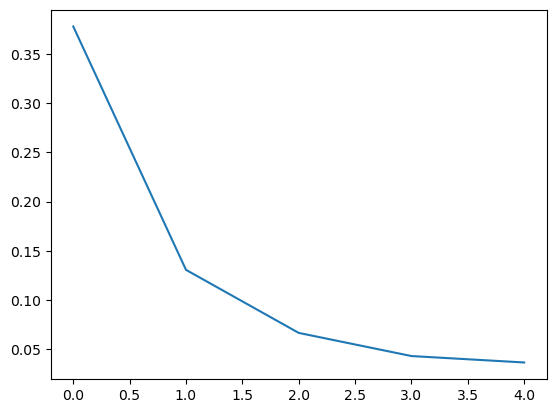

In [575]:
plt.plot(range(len(ipca.explained_variance_)),ipca.explained_variance_ratio_)

In [576]:
pred = model.predict(datosA)
y_test = data["Churn Value"]

reales = np.array(y_test)
print(y_test , pred)


0       1
1       1
2       1
3       1
4       1
       ..
7027    0
7028    0
7029    0
7030    0
7031    0
Name: Churn Value, Length: 7032, dtype: int64 [1 1 1 ... 0 1 0]


1 el cliente dejo la empresa y 0 el cliente permanecio

In [577]:
print(f""" Presición_Predicción : {accuracy_score(pred, reales)} """)

 Presición_Predicción : 0.8279294653014789 


<Figure size 1100x1100 with 0 Axes>

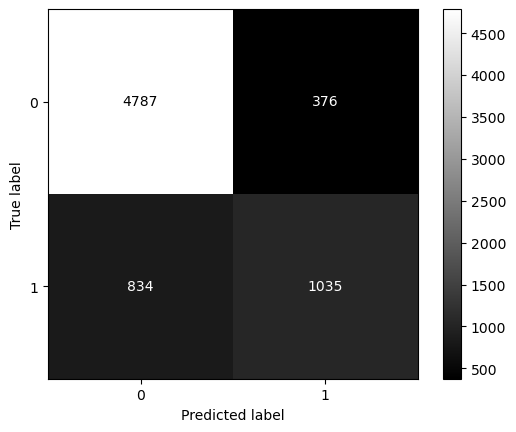

In [578]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, pred ,labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_).plot(cmap = "gray")
plt.show()